# **Introduction to Pandas**

### **Defination of Pandas**

**pandas** is an open source library. It allows us to work in relational as well as labelled data. It provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It is fast and flexible to use.

**Type of data pandas handle :** 

* **Tabular data :** This library helps to explore, clean and process data. In pandas data table is called **DataFrame**.
* **Time Series Data :** Can be ordered and unordered
* **Arbitrary matrix data :** It can be homogeneously typed or heterogeneous typed with row and column labels.
* **Observational / Statistical data :** It is not necessary for all data to be lablled to be placed in pandas data structure.

**Key Features :**

* Easy handling **missing data** --> Represented as NaN (floating + non floating point)
* **Size Mutability :** Size of column in data frame can be changed either by inserting or deleting.
* **Hierarchical labeling :** Axex are labeled inorder.
* **Arrangement :** Data set can be merged or joinned intuitively i.e. without any conscious reasoning.
* **Speed :** It provides intelligent label-based slicing, fancy indexing, and subsetting of large data sets.
* **Easy :** It makes easy to convert the torned or differently indexed data of NumPy or other Python data sturctures in DataFrame objects.
* **Group By :** It involves combination of splitting the object, applying a function, and combining the results. It is used or both aggregating and transforming data.
* **Time series-specific functionality :** Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion, moving window statistics, date shifting and lagging.
* **Flexibility :** Flexible reshaping and pivoting of data sets.
* **Automatic and explicit data alignment :** Objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations

Bellow Code Means:

1. **IPython :** It is a rich toolkit that help us to make the most of using Python interactively.
2. **core.display :** It is a top-level display functions for displaying object in different formats.

> ***Note :*** IPython.core.display contains 10 classes.

Here, we are serving remote HTML. 

When object is returned by an expression or passed to the display function, it results in the data being displayed in the frontend. If the data is a URL, the data will first be downloaded and then displayed.

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=350></iframe>")

C:\Users\91939\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Initially, we imported pandas library as pd.

**set_option(pat, value) :** This function sets the value of the specified option.

Parameters are:
    
1. **pat :** Regexp which should match a single option. It is in string format.

2. **value :** New value of option
    
Here, we specified:

1. html.table_schema to false.
2. max_columns to 30.
3. max_rows to 20.



In [2]:
import pandas as pd

# Set some Pandas options
"""
In using pd.set_option('html', False) in place of pd.set_option('html.table_schema', False) gave OptionError: 'Pattern matched multiple keys'.

Because html pat has multiple keys to match like "border, table_schema, use_mathjax".

"""

pd.set_option('html.table_schema', False)
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# **Pandas Data Structure**

## **Series**

### **Defination**

1. It is one dimentional labeld array.
2. Can hold any data type - integer, float, string, python objects.
3. Axis labels are collectively called **index**. 

Here, we created Series vector named counts and displayed it.

> **Note :** We passed data as list. Here, [632, 1638, 569, 115]

> **Note :** By default, Pandas DataFrame gives its own index, if we do not specify. Here, displayed by default.

> **Note :** Pandas identify data types of list on its own. Here, data type is int64.

In [3]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

**counts.values :** It returns numpy representation of the DataFrame. Here, only the values of the data frame will be returned. Axis labels will be removed.

In [4]:
counts.values


array([ 632, 1638,  569,  115], dtype=int64)

**counts.index :** It returns axis labels of series.

In [5]:
counts.index

RangeIndex(start=0, stop=4, step=1)

Here, we ***assigned*** some useful labels to index in series counts.

In [6]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria


Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

We can also use these index names to ***access*** the data values in Series.

In [7]:
bacteria['Actinobacteria']

569

Library function used here are:

> **endswith() :** This function test if the end of each string element matches a pattern and returns a boolean value True or False.

***Explanation :*** The bellow code returns all those elements in Series whose index ends with word *bacteria* along with their values. By default data type is also diaplayed.


In [8]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

Here, **endswith()** function is implemented. We get a list of boolean value as an output.

In [9]:
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

Although we have assigned index name with some meaningfull names, we can still access Series values using *positional indexing.* We notice that the **indexing operation preserved** the association between the values and the corresponding indices.

In [10]:
bacteria[0]

632

We can **assign name** to our *Series* as well to *the index of series*.

> **Series.name :** It returns the name of the Series. Here, we assigned series name as *counts.*

> **Series.index.name :** It returns the name of the index of series. Here, we assigned index name as *phylum.*

In [11]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

Bellow code shows that *NumPy functions can also be used in Series* data structure.

> **np.log() :** This numpy function is used to calculate element wise natural logirithm.

In [12]:
import numpy as np

np.log(bacteria)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

In *Series data structure* we can also display values by filtering them. Here, 

> *Query :* Print all values greater then 1000.

In [13]:
bacteria[bacteria>1000]

phylum
Proteobacteria    1638
Name: counts, dtype: int64

*Series* can also be created **using dictionary.** It can be thought as an ordered *key-value* pair.

> ***Note :*** Series is created in a key sorted order i.e. keys are sorted in alphabetical order and then diplayed.

In [14]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569, 'Bacteroidetes': 115}
pd.Series(bacteria_dict)

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

Bellow is the demonstration of Series if **custom index** are provided. Simple procedure it follows:

1. It will select corresponding values from dict and then get printed.
2. If such indices are available whose corresponding values are missing. Pandas using **NaN** type for those values.

> *Note :* Hare, data type printed is float64.

In [15]:
bacteria2 = pd.Series(bacteria_dict, index=['Cyanobacteria','Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

**isnull() :** This function is used to check wheather the value in series is null or not. It returns *boolean* value.

In [16]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Series can be **added** using simple airthmetic operations. In addtion :

* It combines values with the same label in the resulting series.
* Missing values are propagated during addition. 

In [17]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

## **Data Frame**

**DataFrame** is a two dimentional series data structure represented in tabular form. It allows us to represent and manipulate higher-dimensional data.

> **Note :** In data frame, every index there are multiple fields or columns of data, which can be of different data types.

In [18]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,value,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


We can **change the order** by indexing them in the order we desire.

> **Note :** DataFrame is sorted by column name.

In [19]:
data[['phylum','value','patient']]

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


***Note :*** DataFrame has two index. 1st is row index which by default is given as 0, 1, 2...etc. The 2nd is column index.

Column index can be displayed as:

> **DataFrame.columns :** Columns attribute return the column labels of the given Dataframe.

In [20]:
data.columns

Index(['value', 'patient', 'phylum'], dtype='object')

We can **access the dataframe** values using column names. It can be done by *dict-like indexing or by attribute.*

Bellow is implementation of *dict-like indexing:*

In [21]:
data['value']

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

Bellow is implementation by *attribte* method:

In [22]:
data.value

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

**type() :** This function is used to get the type of an object.

In [23]:
type(data.value)

pandas.core.series.Series

In [24]:
type(data[['value']])

pandas.core.frame.DataFrame

***.iloc[] :*** This library function is used for purely integer-location based indexing for selection by position. It can also be used with a boolean array.


In [25]:
"""
On using data.ix[3] is displayed

AttributeError: 'DataFrame' object has no attribute 'ix'

Because : .ix is deprecated.

"""

data.iloc[3]       # to display contents of dataframe at position 3.

value                115
patient                1
phylum     Bacteroidetes
Name: 3, dtype: object

We can **create dataframe** using *dict-of-dicts.*

In [26]:
data = pd.DataFrame({0: {'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    1: {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    2: {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    3: {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    4: {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    5: {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    6: {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    7: {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}})

In [27]:
data   # to display the dataframe.

,0,1,2,3,4,5,6,7
patient,1,1,1,1,2,2,2,2
phylum,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes
value,632,1638,569,115,433,1130,754,555


In [28]:
data = data.T   # transposing the dataframe.
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


***Note :*** We don't actually copy the data itself. The returned Series when a DataFrame is indexted is just a view on the DataFrame.

In [29]:
vals = data.value    # assigned the values of dataframe to vals variable.
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: object

In [30]:
vals[5] = 0    # Assigned value at 5th position as 0
vals

0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: object

By assigning the values to vals variable we notice that the actual values also changes. This proves that the data values are not copied instead assigned.

In [31]:
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


***Note :*** Here, we are copying data values using **copy()** function and then changing values. We observe that the values are not changed.

In [32]:
vals = data.value.copy()   # copying data values to vals variable.
vals[5] = 1000             # assigning 5th position of vals as 1000
data                       # printing dataframe.

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


But we can values in dataframe by **direct assignment.**

In [33]:
data.value[3] = 14         # assigning value at index 3 as 14.
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


We can *insert or delete column* in dataframe as per our need.

In [34]:
data['year'] = 2013    # Added column "year" to dataframe and assigned it's value as 2013
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


We cannot use attribute indexing method to add column.

In [35]:
data.treatment = 1      
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


In [36]:
data.treatment

1

The bellow methods shows how new columns can be added in DataFrame:

1. We created a *Series* named *treatment* which contains 4 columns and 2 rows. 

In [37]:
treatment = pd.Series([0]*4 + [1]*2)
treatment

0    0
1    0
2    0
3    0
4    1
5    1
dtype: int64

Here, treatment series is assigned to dataframe data using dict-like indexing method.

In [38]:
data['treatment'] = treatment
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,433,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,754,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


We can create a DataFrame using list such that it should be passed as a dictionary so that it is of same length. 

In [39]:
"""
When using data['month'] = month  it showed 

AssertionError: Length of values does not match length of index

Because we were trying to assign a list of different lenght to the dataframe.

"""

month = ['Jan', 'Feb', 'Mar', 'Apr']

pd.DataFrame({'month':month})

,month
0,Jan
1,Feb
2,Mar
3,Apr


In [40]:
data['month'] = ['Jan']*len(data)
data

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013,0.0,Jan
1,1,Proteobacteria,1638,2013,0.0,Jan
2,1,Actinobacteria,569,2013,0.0,Jan
3,1,Bacteroidetes,14,2013,0.0,Jan
4,2,Firmicutes,433,2013,1.0,Jan
5,2,Proteobacteria,0,2013,1.0,Jan
6,2,Actinobacteria,754,2013,NaN,Jan
7,2,Bacteroidetes,555,2013,NaN,Jan


We can use **del** to remove columns, in the same way dict entries can be removed

In [41]:
del data['month']     # to delete column month
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,433,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,754,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


In [42]:
data.values    # print values of DataFrame

array([[1, 'Firmicutes', 632, 2013, 0.0],
       [1, 'Proteobacteria', 1638, 2013, 0.0],
       [1, 'Actinobacteria', 569, 2013, 0.0],
       [1, 'Bacteroidetes', 14, 2013, 0.0],
       [2, 'Firmicutes', 433, 2013, 1.0],
       [2, 'Proteobacteria', 0, 2013, 1.0],
       [2, 'Actinobacteria', 754, 2013, nan],
       [2, 'Bacteroidetes', 555, 2013, nan]], dtype=object)

***Note :*** The dtype will automatically be chosen to be as general as needed to accomodate all the columns. Here, it is *object* because of the mix of string and integer.

In [43]:
df = pd.DataFrame({'foo': [1,2,3], 'bar':[0.4, -1.0, 4.5]})
df.values

array([[ 1. ,  0.4],
       [ 2. , -1. ],
       [ 3. ,  4.5]])

In [44]:
data.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

Index objects are *immutable.*

In [45]:
"""
when data.index[0] = 15 is used it shows:

TypeError: Index does not support mutable operations

"""

data.index.values[0] = ('15')      # So here we assigned index values in the form of tupple.

In [46]:
bacteria2.index = bacteria.index

In [47]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

## **Importing Data**

In [48]:
# It is linux command to load file
!cat C:\Users\91939\Downloads\data\data\microbiome.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


**pandas.read_csv() :** This command is used to read csv files. Provided that path of file should be completly specified.

In [49]:
mb = pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome.csv")   # Loaded microbiome dataset.
mb

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605
...,...,...,...,...
70,Other,11,203,6
71,Other,12,392,6
72,Other,13,28,25
73,Other,14,12,22


**head() :** By default this command prints top 5 values of rows of dataframe.

**header :** It is used to override default behaviour. Column names are given as row numbers 

In [50]:
pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome.csv", header=None).head()

,0,1,2,3
0,Taxon,Patient,Tissue,Stool
1,Firmicutes,1,632,305
2,Firmicutes,2,136,4182
3,Firmicutes,3,1174,703
4,Firmicutes,4,408,3946


**read_table() :** A csv files is returned as 2-D data with lablled axes.

**sep :** It can be customized as needed to accomodate arbitrary separators. By default it is ','.

In [51]:
mb = pd.read_table(r"C:\Users\91939\Downloads\data\data\microbiome.csv", sep=',')

**Hierarchical index**

We can specify the first two columns, which together provide a unique index to the data

In [52]:
mb = pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome.csv", index_col=['Taxon','Patient'])
mb.head()

Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605

**skiprows :** Skipping rows at specific index positions while reading a csv file to DataFrame.

This commad is used if we do not want to import certain data section.

In [53]:
pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome.csv", skiprows=[3,4,6]).head()

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,5,831,8605
3,Firmicutes,7,718,717
4,Firmicutes,8,173,33


**nrows :** This parameter in *read_csv()* is used to print only small number of rows as per our need.

In [54]:
pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome.csv", nrows=4)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946


**chunksize :** If we want to process our data in reasonable chunks. It returns an iterable object.

In [55]:
"""
Shows KeyError: 0 if we use:

mean_tissue = {chunk.Taxon[0]:chunk.Tissue.mean() for chunk in data_chunks}

We cannot directly access the values of dataframe using row name. We have to use '.values' function to access it.

"""

data_chunks = pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome.csv", chunksize=15)

mean_tissue = {chunk.Taxon.values[0]:chunk.Tissue.mean() for chunk in data_chunks}
    
mean_tissue

{'Firmicutes': 684.4,
 'Proteobacteria': 2943.0666666666666,
 'Actinobacteria': 449.06666666666666,
 'Bacteroidetes': 599.6666666666666,
 'Other': 198.8}

In [56]:
# it is linux command

!cat data/microbiome_missing.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome_missing.csv").head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


Pandas will automatically recognize and parse common missing data indicators, including NA and NULL.

We can check it using ***isnull()*** function.

In [58]:
pd.isnull(pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome_missing.csv")).head(20)

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


**na_values :** In this argument additional strings are specified to be treated as NA/NaN.

Bellow implementation shows that all '?' and '-99999' will be replaced to NA or NaN.

In [59]:
pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome_missing.csv", na_values=['?', -99999]).head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,NaN
9,Firmicutes,10,162.0,3196.0


## **Microsoft Excel**

Pandas can be used to load excel file. Importing Excel data to Pandas is a two-step process. First, we create an **ExcelFile** object using the path of the file

In [60]:
mb_file = pd.ExcelFile(r'C:\Users\91939\Downloads\data\data\microbiome/MID1.xls')
mb_file

**pandas.ExcelFile.parse :** This command retuns a DataFrame or dict of DataFrame from passed ExcelFile. **prase** is used so that we can prase the sheet with the data of interest as it may contain more then 1 sheet.


In [61]:
mb1 = mb_file.parse("Sheet 1", header=None)
mb1.columns = ["Taxon", "Count"]
mb1.head()

,Taxon,Count
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7


**read_excel() :** Read an Excel file into a pandas DataFrame. Supports xls, xlsx, xlsm, xlsb, odf, ods and odt file extensions read from a local filesystem or URL.

In [62]:
mb2 = pd.read_excel(r'C:\Users\91939\Downloads\data\data\microbiome/MID2.xls', sheet_name='Sheet 1', header=None)   # Note that the argument is sheet_name not sheetname it showed type erroe
mb2.head()

,0,1
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2


## **Pandas Fundamental**

Here, we are Reading a comma-separated values (csv) file into DataFrame through *pandas.read_csv()*. Another parameter is used here is:

**index_col :** Column(s) to use as the row labels of the DataFrame, either given as string name or column index. 

In [63]:
baseball = pd.read_csv(r"C:\Users\91939\Downloads\data\data\baseball.csv", index_col='id')
baseball.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


We can create our own index in dataframe using pandas by combining two index.

> **pandas.DataFrame.astype() :** This library function is used to cast a pandas object to a specified dtype.

In [64]:
player_id = baseball.player + baseball.year.astype(str)      # Here, we created an index name player_id by combining player and year(which is of type int, so we converted it's type to string using astype)
baseball_newind = baseball.copy()         
baseball_newind.index = player_id
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto012006,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu012006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi012006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri012006,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra052006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


**is_unique :** This function is used to check wheater the argument has unique value. It returns a unique value. 

Here, we checked wheather the index of the dataframe baseball_newind has unique values or not.

In [65]:
baseball_newind.index.is_unique

False

**value_counts() :** Return a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. It excludes NA values by default.

In [66]:
pd.Series(baseball_newind.index).value_counts()

francju012007    2
benitar012007    2
gomezch022007    2
claytro012007    2
cirilje012007    2
                ..
oliveda022007    1
moyerja012007    1
aloumo012007     1
parkch012007     1
mussimi012007    1
Length: 88, dtype: int64

**loc[] :** It access a group of rows and columns by label(s) or a boolean array. 

In [67]:
"""
When used "baseball_newind.ix['wickmbo012007']" It showed AttributeError: 'DataFrame' object has no attribute 'ix'. because .ix is deprecated

"""

baseball_newind.loc['wickmbo012007']        # iloc cannot be used as it is only for integer values.

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
wickmbo012007,wickmbo01,2007,2,ARI,NL,8,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
wickmbo012007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


We can create a truly unique index by combining *player*, *team* and *year:*

In [68]:
player_unique = baseball.player + baseball.team + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_unique
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu01BOS2006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi01NYA2006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri01MIL2006,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra05NYA2006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [69]:
baseball_newind.index.is_unique      # checking uniqueness of index

True

We can create meaningful indices more easily using a hierarchical index

## **Manipulating Indices**

**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

> **DataFrame.reindex() :** Conform Series/DataFrame to new index with optional filling logic. Places NA/NaN in locations having no value in the previous index. 

> **Note :** We will observe that the id index is not sequential.

In [70]:
baseball.reindex(baseball.index[::-1]).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,,
89534,alomasa02,2007,1,NYN,NL,8,22,1,3,1,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,1,13,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Bellow is the implementation if we want to populate the table with every index:

> **range() :** Finds range to data set.

> **min() :** Finds minimum value

> **max() :** Finds maximum value

We could specify and index that is a sequence from the first to the last id numbers in the database, and Pandas would fill in the missing data with NaN values:

In [71]:
id_range = range(baseball.index.values.min(), baseball.index.values.max())
baseball.reindex(id_range).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006.0,2.0,CHN,NL,19.0,50.0,6.0,14.0,1.0,0.0,1.0,2.0,1.0,1.0,4.0,4.0,0.0,0.0,3.0,0.0,0.0
88642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88643,schilcu01,2006.0,1.0,BOS,AL,31.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88645,myersmi01,2006.0,1.0,NYA,AL,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Missing values can be filled in two ways either by selected values or by rule.

> **ffill() :** Used to fill the missing value in the dataframe. 'ffill' stands for 'forward fill'. 

In [72]:
"""
When we use
baseball.reindex(id_range, method='ffill', columns=['player','year']).head()
It showed
ValueError: index must be monotonic increasing or decreasing

argument method = 'ffill' is used to propagate last valid observation forward to next valid.

"""

baseball.reindex(id_range, columns=['player','year']).ffill().head()   # filled all missing values of player and year columns and printed first five rows of dataframe

,player,year
id,,
88641,womacto01,2006.0
88642,womacto01,2006.0
88643,schilcu01,2006.0
88644,schilcu01,2006.0
88645,myersmi01,2006.0


**fill_value :** Value to use for missing values. Defaults to NaN, but can be any “compatible” value.

In [73]:
baseball.reindex(id_range, fill_value='mr.nobody', columns=['player']).head()

,player
id,
88641,womacto01
88642,mr.nobody
88643,schilcu01
88644,mr.nobody
88645,myersmi01


***Note :*** Reindex does not work if we pass a non-unique index series.

In [74]:
baseball.shape      # printed shape of dataframe baseball

(100, 22)

**pd.drop() :** Drop specified labels from rows or columns.

In [75]:
baseball.drop([89525, 89526])

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89521,bondsba01,2007,1,SFN,NL,126,340,75,94,14,0,28,66.0,5.0,0.0,132,54.0,43.0,3.0,0.0,2.0,13.0
89523,biggicr01,2007,1,HOU,NL,141,517,68,130,31,3,10,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0


In [76]:
baseball.drop(['ibb','hbp'], axis=1)

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,4.0,1.0,11.0


## **Indexing And Selection**

Indexing works analogously to indexing in NumPy arrays, except we can use the labels in the *Index* object to extract values in addition to arrays of integers.

In [77]:
# Sample Series object
hits = baseball_newind.h
hits

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
                   ... 
benitar01FLO2007      0
benitar01SFN2007      0
ausmubr01HOU2007     82
aloumo01NYN2007     112
alomasa02NYN2007      3
Name: h, Length: 100, dtype: int64

In [78]:
# Numpy-style indexing
hits[:3]

womacto01CHN2006    14
schilcu01BOS2006     1
myersmi01NYA2006     0
Name: h, dtype: int64

In [79]:
# Indexing by label
hits[['womacto01CHN2006','schilcu01BOS2006']]

womacto01CHN2006    14
schilcu01BOS2006     1
Name: h, dtype: int64

In [80]:
hits['womacto01CHN2006':'gonzalu01ARI2006']

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
finlest01SFN2006    105
gonzalu01ARI2006    159
Name: h, dtype: int64

In [81]:
hits['womacto01CHN2006':'gonzalu01ARI2006'] = 5
hits

C:\Users\91939\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


womacto01CHN2006      5
schilcu01BOS2006      5
myersmi01NYA2006      5
helliri01MIL2006      5
johnsra05NYA2006      5
                   ... 
benitar01FLO2007      0
benitar01SFN2007      0
ausmubr01HOU2007     82
aloumo01NYN2007     112
alomasa02NYN2007      3
Name: h, Length: 100, dtype: int64

We can *slice along either or both axis* in a dataframe:

In [82]:
baseball_newind[['h','ab']]

,h,ab
womacto01CHN2006,5,50
schilcu01BOS2006,5,2
myersmi01NYA2006,5,0
helliri01MIL2006,5,3
johnsra05NYA2006,5,6
...,...,...
benitar01FLO2007,0,0
benitar01SFN2007,0,0
ausmubr01HOU2007,82,349
aloumo01NYN2007,112,328


Here, all those rows are printed whose *ab* values is greater then 500.

In [83]:
baseball_newind[baseball_newind.ab>500]

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
gonzalu01ARI2006,gonzalu01,2006,1,ARI,NL,153,586,93,5,52,2,15,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,3,4,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,0,26,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,3,11,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
griffke02CIN2007,griffke02,2007,1,CIN,NL,144,528,78,146,24,1,30,93.0,6.0,1.0,85,99.0,14.0,1.0,0.0,9.0,14.0
delgaca01NYN2007,delgaca01,2007,1,NYN,NL,139,538,71,139,30,0,24,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0
biggicr01HOU2007,biggicr01,2007,1,HOU,NL,141,517,68,130,31,3,10,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0


In [84]:
baseball_newind.loc['gonzalu01ARI2006', ['h','X2b', 'X3b', 'hr']]   # ix. is depreciated. Therefore, we used loc

h       5
X2b    52
X3b     2
hr     15
Name: gonzalu01ARI2006, dtype: object

***Note :*** Using [[ ]] returns a DataFrame.

In [107]:
baseball_newind.loc[['gonzalu01ARI2006','finlest01SFN2006'], ['g', 'ab', 'r']]    # this shows that we can extract rows and columns according to our need.

,g,ab,r
gonzalu01ARI2006,153,586,93
finlest01SFN2006,139,426,66


In [108]:
baseball_newind.loc[:'myersmi01NYA2006', 'hr']    

womacto01CHN2006    1
schilcu01BOS2006    0
myersmi01NYA2006    0
Name: hr, dtype: int64

**DataFrame.xs() :** Returns cross section from the Series/DataFrame. This dataframe takes a key argument to select data at a particular level of a multi-index.

In [109]:
baseball_newind.xs('myersmi01NYA2006')

player    myersmi01
year           2006
stint             1
team            NYA
lg               AL
            ...    
ibb               0
hbp               0
sh                0
sf                0
gidp              0
Name: myersmi01NYA2006, Length: 22, dtype: object

## **Operations**

*DataFrame* and *Series* objects allow for several operations to take place either on a single object, or between two or more objects.

We can perform arithmetic on the elements of two objects as shown bellow. Here, we are combining baseball statistics across years.

In [110]:
hr2006 = baseball[baseball.year==2006].xs('hr', axis=1)
hr2006.index = baseball.player[baseball.year==2006]

hr2007 = baseball[baseball.year==2007].xs('hr', axis=1)
hr2007.index = baseball.player[baseball.year==2007]

In [111]:
hr2006 = pd.Series(baseball.hr[baseball.year==2006].values, index=baseball.player[baseball.year==2006])
hr2007 = pd.Series(baseball.hr[baseball.year==2007].values, index=baseball.player[baseball.year==2007])

In [112]:
hr_total = hr2006 + hr2007
hr_total

player
alomasa02   NaN
aloumo01    NaN
ausmubr01   NaN
benitar01   NaN
benitar01   NaN
             ..
wickmbo01   NaN
williwo02   NaN
witasja01   NaN
womacto01   NaN
zaungr01    NaN
Length: 94, dtype: float64

***Note :*** Pandas' data alignment places NaN values for labels that do not overlap in the two Series.

In [113]:
hr_total[hr_total.notnull()]

player
finlest01     7.0
gonzalu01    30.0
johnsra05     0.0
myersmi01     0.0
schilcu01     0.0
seleaa01      0.0
dtype: float64

**pandas.DataFrame.add() :** Get Addition of dataframe and other, element-wise (binary operator add). It returns a *dataframe.*

*Parameters are :*

1. *other :* Any single or multiple element data structure, or list-like object.
2. *axis :* Whether to compare by the index (0 or index) or columns (1 or columns)
3. *level :* Broadcast across a level, matching Index values on the passed MultiIndex level
4. *fill_value :* Fill existing missing (NaN) values, and any new element needed for successful DataFrame alignment.

In [114]:
hr2007.add(hr2006, fill_value=0)

player
alomasa02     0.0
aloumo01     13.0
ausmubr01     3.0
benitar01     0.0
benitar01     0.0
             ... 
wickmbo01     0.0
williwo02     1.0
witasja01     0.0
womacto01     1.0
zaungr01     10.0
Length: 94, dtype: float64

***Note :*** Operations can also be broadcast between rows or columns.

Here, we substracted maximum number of home runs hit by *hr* column. 

In [115]:
baseball.hr - baseball.hr.max()         # we will get how many fewer than the maximum were hit by each player

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
         ..
89525   -35
89526   -35
89530   -32
89533   -22
89534   -35
Name: hr, Length: 100, dtype: int64

*Row wise observation :* See how a particular player compares with the rest of the group with respect to important statistics.

In [116]:
baseball.loc[89521]["player"]        # using loc[] to access index as ix was depreciated

'bondsba01'

In [117]:
stats = baseball[['h','X2b', 'X3b', 'hr']]
diff = stats - stats.xs(89521)
diff[:10]

,h,X2b,X3b,hr
id,,,,
88641,-80,-13,0,-27
88643,-93,-14,0,-28
88645,-94,-14,0,-28
88649,-94,-14,0,-28
88650,-93,-14,0,-28
88652,11,7,12,-22
88653,65,38,2,-13
88662,-89,-13,0,-28
89177,-84,-11,0,-28


***Note :*** We can also apply functions to each column or row of a DataFrame.

**pandas.DataFrame.apply() :** Apply a function along an axis of the DataFrame.

In [118]:
stats.apply(np.median)

h      8.0
X2b    1.0
X3b    0.0
hr     0.0
dtype: float64

In [119]:
stat_range = lambda x: x.max() - x.min()
stats.apply(stat_range)

h      159
X2b     52
X3b     12
hr      35
dtype: int64

Calculating **slugging percentage :**

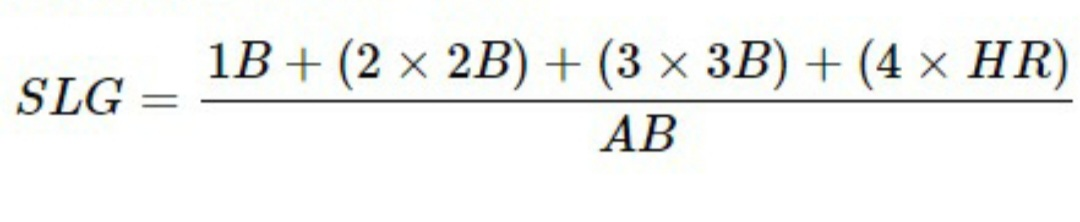

In [120]:
slg = lambda x: (x['h']-x['X2b']-x['X3b']-x['hr'] + 2*x['X2b'] + 3*x['X3b'] + 4*x['hr'])/(x['ab']+1e-6)
baseball.apply(slg, axis=1).apply(lambda x: '%.3f' % x)

id
88641    0.360
88643    0.500
88645    0.000
88649    0.000
88650    0.167
         ...  
89525    0.000
89526    0.000
89530    0.324
89533    0.524
89534    0.182
Length: 100, dtype: object

## **Sortung and Ranking**

**sort_index() :** Sort object by labels (along an axis). Returns a new DataFrame sorted by label if inplace argument is False, otherwise updates the original DataFrame and returns None.

In [121]:
baseball_newind.sort_index().head()

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
alomasa02NYN2007,alomasa02,2007,1,NYN,NL,8,22,1,3,1,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
aloumo01NYN2007,aloumo01,2007,1,NYN,NL,87,328,51,112,19,1,13,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
ausmubr01HOU2007,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
benitar01FLO2007,benitar01,2007,2,FLO,NL,34,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
benitar01SFN2007,benitar01,2007,1,SFN,NL,19,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here, **ascending** argument is set as *false*. This arrgument sort values in ascending or descending. It takes boolean arrgument. By default it is True.

In [122]:
baseball_newind.sort_index(ascending=False).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
zaungr01TOR2007,zaungr01,2007,1,TOR,AL,110,331,43,80,24,1,10,52.0,0.0,0.0,51,55.0,8.0,2.0,1.0,6.0,9.0
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,5,1,0,1,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
witasja01TBA2007,witasja01,2007,1,TBA,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
williwo02HOU2007,williwo02,2007,1,HOU,NL,33,59,3,6,0,0,1,2.0,0.0,0.0,0,25.0,0.0,0.0,5.0,0.0,1.0
wickmbo01ATL2007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here, we used **axis** argument. Which is 0 for index (rows) and 1 for columns. By default it is 0. It is the axis along which to sort.

In [123]:
baseball_newind.sort_index(axis=1).head()

,X2b,X3b,ab,bb,cs,g,gidp,h,hbp,hr,ibb,lg,player,r,rbi,sb,sf,sh,so,stint,team,year
womacto01CHN2006,1,0,50,4,1.0,19,0.0,5,0.0,1,0.0,NL,womacto01,6,2.0,1.0,0.0,3.0,4.0,2,CHN,2006
schilcu01BOS2006,0,0,2,0,0.0,31,0.0,5,0.0,0,0.0,AL,schilcu01,0,0.0,0.0,0.0,0.0,1.0,1,BOS,2006
myersmi01NYA2006,0,0,0,0,0.0,62,0.0,5,0.0,0,0.0,AL,myersmi01,0,0.0,0.0,0.0,0.0,0.0,1,NYA,2006
helliri01MIL2006,0,0,3,0,0.0,20,0.0,5,0.0,0,0.0,NL,helliri01,0,0.0,0.0,0.0,0.0,2.0,1,MIL,2006
johnsra05NYA2006,0,0,6,0,0.0,33,0.0,5,0.0,0,0.0,AL,johnsra05,0,0.0,0.0,0.0,0.0,4.0,1,NYA,2006


**sort_values() :** Sort a Series by values in ascending or descending order by some criterion. 

In [124]:
"""
When used  : baseball.hr.order(ascending=False)
showed  :  AttributeError: 'Series' object has no attribute 'order'

Because order was depreciated in new version of python.

"""

baseball.hr.sort_values(ascending=False)

id
89360    35
89462    30
89521    28
89361    26
89378    25
         ..
89370     0
89367     0
89469     0
89365     0
89534     0
Name: hr, Length: 100, dtype: int64

We can sort values in the DataFrame by one or more columns. This can be done through **sort_values()** using **by** arrgument.

In [125]:
"""

baseball[['player','sb','cs']].sort_index(ascending=[False,True], by=['sb', 'cs']).head(10)

TypeError: sort_index() got an unexpected keyword argument 'by'

"""

baseball[['player','sb','cs']].sort_values(ascending=[False,True], by=['sb', 'cs']).head(10)

,player,sb,cs
id,,,
89378,sheffga01,22.0,5.0
89430,loftoke01,21.0,4.0
89347,vizquom01,14.0,6.0
89463,greensh01,11.0,1.0
88652,finlest01,7.0,0.0
89462,griffke02,6.0,1.0
89530,ausmubr01,6.0,1.0
89466,gonzalu01,6.0,2.0
89521,bondsba01,5.0,0.0


**pandas.DataFrame.rank :** Compute numerical data ranks (1 through n) along axis. By default, equal values are assigned a rank that is the average of the ranks of those values.

It actually does not re-arranges data but returns an index that ranks each value relative to others in the Series.

In [126]:
baseball.hr.rank()

id
88641    62.5
88643    29.0
88645    29.0
88649    29.0
88650    29.0
         ... 
89525    29.0
89526    29.0
89530    71.5
89533    88.0
89534    29.0
Name: hr, Length: 100, dtype: float64

Ties are assigned the mean value of the tied ranks, which may result in decimal values.

In [127]:
pd.Series([100,100]).rank()     

0    1.5
1    1.5
dtype: float64

Here, **method** argument of *rank()* is implemented. Default value of this argument is *average*. It determines how to rank the group of records that have the same value. *first:* ranks assigned in order they appear in the array.

In [129]:
baseball.hr.rank(method='first')

id
88641    58.0
88643     1.0
88645     2.0
88649     3.0
88650     4.0
         ... 
89525    55.0
89526    56.0
89530    72.0
89533    88.0
89534    57.0
Name: hr, Length: 100, dtype: float64

Calling the *DataFrame's rank method* results in the ranks of all columns:

In [130]:
baseball.rank(ascending=False).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,,
88641,2.0,96.5,7.0,82.0,31.5,70.0,47.5,40.5,39.0,50.5,63.5,38.5,51.0,24.5,17.5,44.5,59.0,66.0,65.5,16.0,70.0,76.5
88643,37.5,96.5,57.0,88.0,81.5,55.5,73.0,81.0,63.5,78.0,63.5,72.0,78.5,63.5,62.5,79.0,73.0,66.0,65.5,67.5,70.0,76.5
88645,47.5,96.5,57.0,40.5,81.5,36.0,91.0,81.0,84.5,78.0,63.5,72.0,78.5,63.5,62.5,79.0,89.0,66.0,65.5,67.5,70.0,76.5
88649,66.0,96.5,57.0,47.0,31.5,67.5,69.0,81.0,84.5,78.0,63.5,72.0,78.5,63.5,62.5,79.0,67.0,66.0,65.5,67.5,70.0,76.5
88650,61.5,96.5,57.0,40.5,81.5,51.0,64.5,81.0,63.5,78.0,63.5,72.0,78.5,63.5,62.5,79.0,59.0,66.0,65.5,67.5,70.0,76.5


In [131]:
baseball[['r','h','hr']].rank(ascending=False).head()         # Displayed 'r', 'h', 'hr' rows of dataframe.

,r,h,hr
id,,,
88641,40.5,39.0,38.5
88643,81.0,63.5,72.0
88645,81.0,84.5,72.0
88649,81.0,84.5,72.0
88650,81.0,63.5,72.0


## **Exercise**

Calculate on **base percentage** for each player, and return the ordered series of estimates.

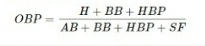

In [185]:
bp = lambda x: (x['h'] + x['bb'] + x['hbp'])/(x['ab'] + x['bb'] + x['hbp'] + x['sf'] + 1e-6)   # added 1e-6 term at denominator to remove ZeroDivisionError 
baseball.apply(bp, axis=1).apply(lambda x: '%.3f' % x)

id
88641    0.333
88643    0.500
88645    0.000
88649    0.000
88650    0.167
         ...  
89525    0.000
89526    0.000
89530    0.318
89533    0.392
89534    0.136
Length: 100, dtype: object

## **Hierarchical indexing**

**Hierarchical also known as Multi-level indexing** helps to work in with *higher dimensional data.* It is helpful for sophisticated data analysis and manipulation. It enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In the baseball example, we were forced to combine 3 fields to obtain a unique index that was not simply an integer value. A more elegant way to have done this would be to create a hierarchical index from the three fields.

In [134]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

stint  lg    g   ab   r    h  X2b  X3b  hr   rbi   sb  \
year team player                                                             
2006 CHN  womacto01      2  NL   19   50   6   14    1    0   1   2.0  1.0   
     BOS  schilcu01      1  AL   31    2   0    1    0    0   0   0.0  0.0   
     NYA  myersmi01      1  AL   62    0   0    0    0    0   0   0.0  0.0   
     MIL  helliri01      1  NL   20    3   0    0    0    0   0   0.0  0.0   
     NYA  johnsra05      1  AL   33    6   0    1    0    0   0   0.0  0.0   
     SFN  finlest01      1  NL  139  426  66  105   21   12   6  40.0  7.0   
     ARI  gonzalu01      1  NL  153  586  93  159   52    2  15  73.0  0.0   
     LAN  seleaa01       1  NL   28   26   2    5    1    0   0   0.0  0.0   
2007 ATL  francju01      2  NL   15   40   1   10    3    0   0   8.0  0.0   
     NYN  francju01      1  NL   40   50   7   10    0    0   1   8.0  2.0   

                      cs  bb    so   ibb  hbp   sh   sf  gidp  
year team player                                               
2006 CHN  womacto01  1.0   4   4.0   0.0  0.0  3.0  0.0   0.0  
     BOS  schilcu01  0.0   0   1.0   0.0  0.0  0.0  0.0   0.0  
     NYA  myersmi01  0.0   0   0.0   0.0  0.0  0.0  0.0   0.0  
     MIL  helliri01  0.0   0   2.0   0.0  0.0  0.0  0.0   0.0  
     NYA  johnsra05  0.0   0   4.0   0.0  0.0  0.0  0.0   0.0  
     SFN  finlest01  0.0  46  55.0   2.0  2.0  3.0  4.0   6.0  
     ARI  gonzalu01  1.0  69  58.0  10.0  7.0  0.0  6.0  14.0  
     LAN  seleaa01   0.0   1   7.0   0.0  0.0  6.0  0.0   1.0  
2007 ATL  francju01  0.0   4  10.0   1.0  0.0  0.0  1.0   1.0  
     NYN  francju01  1.0  10  13.0   0.0  0.0  0.0  1.0   1.0

***Note :***

1. This index is a MultiIndex object that consists of a sequence of tuples.
2. Where there are multiple repeated values, Pandas does not print the repeats, making it easy to identify groups of values.
3. The elements of which is some combination of the three columns is used to create the index.

In [135]:
baseball_h.index[:10]              

MultiIndex([(2006, 'CHN', 'womacto01'),
            (2006, 'BOS', 'schilcu01'),
            (2006, 'NYA', 'myersmi01'),
            (2006, 'MIL', 'helliri01'),
            (2006, 'NYA', 'johnsra05'),
            (2006, 'SFN', 'finlest01'),
            (2006, 'ARI', 'gonzalu01'),
            (2006, 'LAN',  'seleaa01'),
            (2007, 'ATL', 'francju01'),
            (2007, 'NYN', 'francju01')],
           names=['year', 'team', 'player'])

In [136]:
baseball_h.index.is_unique           # verifying uniqueness of index 

True

In [137]:
baseball_h.loc[(2007, 'ATL', 'francju01')]           # .ix was depreciated Therefore used loc to access index

stint     2
lg       NL
g        15
ab       40
r         1
h        10
X2b       3
X3b       0
hr        0
rbi       8
sb        0
cs        0
bb        4
so       10
ibb       1
hbp       0
sh        0
sf        1
gidp      1
Name: (2007, ATL, francju01), dtype: object

In [138]:
mb = pd.read_csv(r"C:\Users\91939\Downloads\data\data\microbiome.csv", index_col=['Taxon','Patient'])

In [139]:
mb.head(10)

Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605
           6           693     50
           7           718    717
           8           173     33
           9           228     80
           10          162   3196

In [140]:
mb.index

MultiIndex([(    'Firmicutes',  1),
            (    'Firmicutes',  2),
            (    'Firmicutes',  3),
            (    'Firmicutes',  4),
            (    'Firmicutes',  5),
            (    'Firmicutes',  6),
            (    'Firmicutes',  7),
            (    'Firmicutes',  8),
            (    'Firmicutes',  9),
            (    'Firmicutes', 10),
            (    'Firmicutes', 11),
            (    'Firmicutes', 12),
            (    'Firmicutes', 13),
            (    'Firmicutes', 14),
            (    'Firmicutes', 15),
            ('Proteobacteria',  1),
            ('Proteobacteria',  2),
            ('Proteobacteria',  3),
            ('Proteobacteria',  4),
            ('Proteobacteria',  5),
            ('Proteobacteria',  6),
            ('Proteobacteria',  7),
            ('Proteobacteria',  8),
            ('Proteobacteria',  9),
            ('Proteobacteria', 10),
            ('Proteobacteria', 11),
            ('Proteobacteria', 12),
            ('Proteobacteria

We can select subsets of the data based on a *partial index* uisng hierarchical index.

In [141]:
mb.loc['Proteobacteria']

,Tissue,Stool
Patient,,
1,1638,3886
2,2469,1821
3,839,661
4,4414,18
5,12044,83
6,2310,12
7,3053,547
8,395,2174
9,2651,767


Hierarchical indices can be created on either or both axes. Example:

In [142]:
frame = pd.DataFrame(np.arange(12).reshape(( 4, 3)), 
                  index =[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                  columns =[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

We can **give names** to *rows* and *columns* if we want.

In [143]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

We can do any sort of **custom indexing.**

In [144]:
frame.loc['a']['Ohio']         

color,Green,Red
key2,,
1,0,1
2,3,4


In [145]:
frame.loc['b', 2]['Colorado']

color
Green    11
Name: (b, 2), dtype: int32

**swaplevel() :** Swap levels i and j in a MultiIndex on a particular axis. It returns a dataframe.

In [146]:
mb.swaplevel('Patient', 'Taxon').head()

,,Tissue,Stool
Patient,Taxon,,
1,Firmicutes,632,305
2,Firmicutes,136,4182
3,Firmicutes,1174,703
4,Firmicutes,408,3946
5,Firmicutes,831,8605


Using argument **level** in *sort_index()*. This sort on values in specified index level(s) if it's *not none.*

Here, we sorted data by any index level.

In [147]:
"""
When used   :     mb.sortlevel('Patient', ascending=False).head()
showed  :   AttributeError: 'DataFrame' object has no attribute 'sortlevel'

Because  :  sortlevel() - Deprecated since version 0.20.0

"""

mb.sort_index(level = 'Patient', ascending=False).head()

,,Tissue,Stool
Taxon,Patient,,
Proteobacteria,15,1307,53
Other,15,305,32
Firmicutes,15,281,2377
Bacteroidetes,15,102,33
Actinobacteria,15,310,204


## **Missing data**

Missing data are represented in Series and DataFrame objects by the *NaN* floating point value. *None* is also treated as missing. 

In [148]:
"""
Showed :  NameError: name 'NaN' is not defined

Because   :   Python does not have a built-in name nan, nor is there a keyword.

"""

from numpy import NaN       
    
foo = pd.Series([NaN, -3, None, 'foobar'])
foo

0       NaN
1        -3
2      None
3    foobar
dtype: object

In [149]:
foo.isnull()    

0     True
1    False
2     True
3    False
dtype: bool

In [150]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

**pandas.DataFrame.dropna() :** Used to remove missing values.

In [151]:
bacteria2.dropna()

phylum
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

**notnull() :** Function detects existing/ non-missing values in the dataframe. It returns a boolean object having the same size as that of the object on which it is applied, indicating whether each individual value is a na value or not.

In [152]:
bacteria2[bacteria2.notnull()]

phylum
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [153]:
data

,patient,phylum,value,year,treatment
15,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,433,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,754,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


***Note :*** By default, dropna drops entire rows in which one or more values are missing.

In [154]:
data.dropna()

,patient,phylum,value,year,treatment
15,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,433,2013,1.0
5,2,Proteobacteria,0,2013,1.0


Using **how** argument of *dropna().* It determine if row or column is removed from DataFrame, when we have *at least one NA* or *all NA.* 

> ***all*** : If all values are NA, drop that row or column.

> ***any*** : If any NA values are present, drop that row or column.

In [155]:
data.dropna(how='all')

,patient,phylum,value,year,treatment
15,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,433,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,754,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


We can also customize our DataFrame. Here, we specifyed how many values need to be present before a row is dropped via the thresh argument.

In [156]:
from numpy import nan
data.loc[7, 'year'] = nan
data

,patient,phylum,value,year,treatment
15,1,Firmicutes,632,2013.0,0.0
1,1,Proteobacteria,1638,2013.0,0.0
2,1,Actinobacteria,569,2013.0,0.0
3,1,Bacteroidetes,14,2013.0,0.0
4,2,Firmicutes,433,2013.0,1.0
5,2,Proteobacteria,0,2013.0,1.0
6,2,Actinobacteria,754,2013.0,NaN
7,2,Bacteroidetes,555,NaN,NaN


In [157]:
data.dropna(thresh=4)

,patient,phylum,value,year,treatment
15,1,Firmicutes,632,2013.0,0.0
1,1,Proteobacteria,1638,2013.0,0.0
2,1,Actinobacteria,569,2013.0,0.0
3,1,Bacteroidetes,14,2013.0,0.0
4,2,Firmicutes,433,2013.0,1.0
5,2,Proteobacteria,0,2013.0,1.0
6,2,Actinobacteria,754,2013.0,NaN


Using **axis** argument of *dropna().* This argument determine if rows or columns which contain missing values are removed. By default it is 0.

1. *0* or *index* : Drop rows which contain missing values.
2. *1* or *columns* : Drop columns which contain missing value.

In [158]:
data.dropna(axis=1)       

,patient,phylum,value
15,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Rather than removing missing data from an analysis we can also fill the missing value in, either with a default value (such as zero) or a value that is either imputed or carried forward/backward from similar data points. We can do this with the help of Pandas with the fillna argument.

**pandas.DataFrame.fillna() :** Fill NA/NaN values using the specified method. Returns *dataframe* or *none*

*Parameters are :*

1. **value :** Value to use to fill holes 
2. **method :** Method to use for filling holes in reindexed Series {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
3. **axis :** Axis along which to fill missing values. {0 or ‘index’, 1 or ‘columns’}
4. **inplace :** By default, False. If True, fill in-place.
5. **limit :** If method is specified, this is the maximum number of consecutive NaN values to forward/backward fill. 
6. **downcast :** A dict of item->dtype of what to downcast if possible, or the string ‘infer’ which will try to downcast to an appropriate equal type . 

In [159]:
bacteria2.fillna(0)

phylum
Firmicutes           0.0
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [160]:
data.fillna({'year': 2013, 'treatment':2})

,patient,phylum,value,year,treatment
15,1,Firmicutes,632,2013.0,0.0
1,1,Proteobacteria,1638,2013.0,0.0
2,1,Actinobacteria,569,2013.0,0.0
3,1,Bacteroidetes,14,2013.0,0.0
4,2,Firmicutes,433,2013.0,1.0
5,2,Proteobacteria,0,2013.0,1.0
6,2,Actinobacteria,754,2013.0,2.0
7,2,Bacteroidetes,555,2013.0,2.0


***Note :*** By default returns a new object with the desired filling behavior. 

In [161]:
data

,patient,phylum,value,year,treatment
15,1,Firmicutes,632,2013.0,0.0
1,1,Proteobacteria,1638,2013.0,0.0
2,1,Actinobacteria,569,2013.0,0.0
3,1,Bacteroidetes,14,2013.0,0.0
4,2,Firmicutes,433,2013.0,1.0
5,2,Proteobacteria,0,2013.0,1.0
6,2,Actinobacteria,754,2013.0,NaN
7,2,Bacteroidetes,555,NaN,NaN


In [162]:
_ = data.year.fillna(2013, inplace=True)
data

,patient,phylum,value,year,treatment
15,1,Firmicutes,632,2013.0,0.0
1,1,Proteobacteria,1638,2013.0,0.0
2,1,Actinobacteria,569,2013.0,0.0
3,1,Bacteroidetes,14,2013.0,0.0
4,2,Firmicutes,433,2013.0,1.0
5,2,Proteobacteria,0,2013.0,1.0
6,2,Actinobacteria,754,2013.0,NaN
7,2,Bacteroidetes,555,2013.0,NaN


**bfill :** use next valid observation to fill gap.

In [163]:
bacteria2.fillna(method='bfill')

phylum
Firmicutes         632.0
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [164]:
bacteria2.fillna(bacteria2.mean())

phylum
Firmicutes         946.333333
Proteobacteria     632.000000
Actinobacteria    1638.000000
Bacteroidetes      569.000000
dtype: float64

## **Data summarization**

Data Summarization is useful so that data can be more easily be understood or compared with similar data. Some of the pandas function are:

In [165]:
baseball.sum()

player    womacto01schilcu01myersmi01helliri01johnsra05f...
year                                                 200692
stint                                                   113
team      CHNBOSNYAMILNYASFNARILANATLNYNTORTBAHOUARIATLM...
lg        NLALALNLALNLNLNLNLNLALALNLNLNLALNLNLNLNLALALNL...
                                ...                        
ibb                                                     177
hbp                                                     112
sh                                                      138
sf                                                      120
gidp                                                    354
Length: 22, dtype: object

Here, we observe **sum** is more meaningful for some columns than others.

But if we use methods like **mean** it would be worthless and impossible to calculate mean of string values. Therefore these columns are excluded automatically.

In [166]:
baseball.mean()

year     2006.92
stint       1.13
g          52.38
ab        136.54
r          18.69
h          35.82
X2b         7.39
X3b         0.55
hr          4.37
rbi        18.47
sb          1.38
cs          0.46
bb         15.49
so         24.08
ibb         1.77
hbp         1.12
sh          1.38
sf          1.20
gidp        3.54
dtype: float64

The important difference between NumPy's functions and Pandas' methods is that the latter have built-in support for handling missing data.

In [167]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [168]:
bacteria2.mean()

946.3333333333334

In [169]:
bacteria2.mean(skipna=False)         # if we don't want to ignore missing values.

nan

In [170]:
extra_bases = baseball[['X2b','X3b','hr']].sum(axis=1)        # axis = 1, summarize over rows instead of columns
extra_bases.sort_values(ascending=False)

id
88653    69
89439    57
89361    56
89462    55
89396    54
         ..
89355     0
89354     0
89480     0
89348     0
89420     0
Length: 100, dtype: int64

**pandas.DataFrame.describe() :** Generate descriptive statistics which include the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Analyzes both *numeric* and *object series.* Returns *Series* or *DataFrame*

In [171]:
baseball.describe()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
count,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,2006.92000,1.130000,52.380000,136.540000,18.69000,35.820000,7.390000,0.550000,4.370000,18.47000,1.380000,0.460000,15.490000,24.080000,1.770000,1.12000,1.380000,1.200000,3.540000
std,0.27266,0.337998,48.031299,181.936853,27.77496,50.221807,11.117277,1.445124,7.975537,28.34793,3.694878,1.067613,25.812649,32.804496,5.042957,2.23055,2.919042,2.035046,5.201826
min,2006.00000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2007.00000,1.000000,9.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2007.00000,1.000000,33.000000,40.500000,2.00000,8.000000,1.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,2007.00000,1.000000,83.250000,243.750000,33.25000,62.750000,11.750000,1.000000,6.000000,27.00000,1.000000,0.000000,19.250000,37.250000,1.250000,1.00000,1.000000,2.000000,6.000000
max,2007.00000,2.000000,155.000000,586.000000,107.00000,159.000000,52.000000,12.000000,35.000000,96.00000,22.000000,6.000000,132.000000,134.000000,43.000000,11.00000,14.000000,9.000000,21.000000


In [172]:
baseball.player.describe()          # detecting non-numeric data and sometimes yield useful information about it.

count           100
unique           82
top       finlest01
freq              2
Name: player, dtype: object

We can also calculate summary statistics across multiple columns, for example, correlation and covariance.

In [173]:
baseball.hr.cov(baseball.X2b)

69.07646464646454

In [174]:
baseball.hr.corr(baseball.X2b)

0.7790615182539742

In [175]:
baseball.ab.corr(baseball.h)

0.9942174036272377

In [176]:
baseball.corr()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
year,1.000000,0.004384,-0.050874,-0.001360,-0.023315,0.001151,-0.052917,-0.246099,0.060199,0.042812,0.030480,0.058296,0.005626,0.069610,0.015868,-0.000664,-0.012184,-0.007282,0.052131
stint,0.004384,1.000000,-0.257552,-0.216333,-0.209781,-0.206878,-0.196423,-0.085821,-0.209124,-0.205688,-0.120837,-0.055425,-0.190301,-0.214121,-0.118580,-0.195074,-0.091527,-0.155662,-0.224173
g,-0.050874,-0.257552,1.000000,0.935910,0.910262,0.929292,0.885847,0.518663,0.802014,0.891563,0.492362,0.520923,0.828572,0.866499,0.514423,0.730161,0.079361,0.767543,0.863041
ab,-0.001360,-0.216333,0.935910,1.000000,0.965609,0.994217,0.952249,0.535986,0.843308,0.947911,0.533536,0.577192,0.850803,0.923926,0.506398,0.767210,0.094537,0.840361,0.926632
r,-0.023315,-0.209781,0.910262,0.965609,1.000000,0.970560,0.923508,0.500807,0.890060,0.941483,0.596343,0.576454,0.915010,0.879375,0.588882,0.806523,-0.001273,0.839592,0.894724
h,0.001151,-0.206878,0.929292,0.994217,0.970560,1.000000,0.957275,0.514245,0.855163,0.952320,0.530018,0.571629,0.853384,0.906966,0.513009,0.767449,0.045533,0.839737,0.935525
X2b,-0.052917,-0.196423,0.885847,0.952249,0.923508,0.957275,1.000000,0.493267,0.779062,0.901751,0.413655,0.477487,0.780012,0.862149,0.453301,0.738226,0.005659,0.819361,0.906860
X3b,-0.246099,-0.085821,0.518663,0.535986,0.500807,0.514245,0.493267,1.000000,0.210028,0.369890,0.450421,0.384312,0.350682,0.408800,0.090993,0.217474,0.187012,0.394987,0.411577
hr,0.060199,-0.209124,0.802014,0.843308,0.890060,0.855163,0.779062,0.210028,1.000000,0.948787,0.364346,0.345187,0.916774,0.865929,0.673691,0.767411,-0.145374,0.782038,0.798350
rbi,0.042812,-0.205688,0.891563,0.947911,0.941483,0.952320,0.901751,0.369890,0.948787,1.000000,0.394633,0.435011,0.893945,0.929410,0.582982,0.780899,-0.054670,0.855260,0.906908


In [177]:
mb.head()

Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605

In [178]:
mb.sum(level='Taxon')

,Tissue,Stool
Taxon,,
Firmicutes,10266,30477
Proteobacteria,44146,16369
Actinobacteria,6736,2263
Bacteroidetes,8995,4656
Other,2982,519


## **Writing Data to Files**

Pandas can also export data to a variety of storage formats. Bellow are some implementation:

**pandas.DataFrame.to_csv() :** This function write object to a comma-separated values (csv) file. 

*Parameters are :*

1. **path_or_buf :** File path or object
2. **sep :** String of length 1. Field delimiter for the output file.
3. **na_rep :** Missing data representation.
4. **float_format :** Format string for floating point numbers.
5. **column :** Columns to write.

And many more...

In [179]:
mb.to_csv("mb.csv")

**pandas.DataFrame.to_pickle() :** Pickle (serialize) object to file. It is an efficient way of storing data to disk is in binary format.

> ***Note :***  Binary storage of data via pickle only be used as a temporary storage format. This is because there is no guarantee that the pickle format will not change with future versions of Python

In [180]:
baseball.to_pickle("baseball_pickle")

**pandas.read_pickle() :** Load pickled pandas object (or any object) from file, i.e. it restores the pickle to a DataFrame or Series.

In [181]:
pd.read_pickle("baseball_pickle")

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
